### Data analysis
##### Data set: ECAD temperature data from Berlin-Tempelhof

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/ECA_blended_custom/TG_STAID002759.txt', sep=',', header=14)
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
53717,111448,20230127,16,0
53718,111448,20230128,1,0
53719,111448,20230129,11,0
53720,111448,20230130,38,0


In [3]:
df_temp=df.drop(df.columns[0], axis=1)
df_temp

,DATE,TG,Q_TG
0,18760101,22,0
1,18760102,25,0
2,18760103,3,0
3,18760104,-58,0
4,18760105,-98,0
...,...,...,...
53717,20230127,16,0
53718,20230128,1,0
53719,20230129,11,0
53720,20230130,38,0


In [4]:
# Parse the datetime:

df_temp['date']=pd.to_datetime(df['    DATE'], format='%Y%m%d')

In [7]:
df_temp.drop('    DATE', axis=1, inplace=True)
df_temp.columns = ['temperature', 'quality', 'date']
df_temp.set_index('date', inplace=True, drop=True) 

,temperature,quality,date
0,22,0,1876-01-01
1,25,0,1876-01-02
2,3,0,1876-01-03
3,-58,0,1876-01-04
4,-98,0,1876-01-05
...,...,...,...
53717,16,0,2023-01-27
53718,1,0,2023-01-28
53719,11,0,2023-01-29
53720,38,0,2023-01-30


In [9]:
# Change the unit od the temperture to a more usual unit

df_temp['temperature'] = df_temp['temperature'] / 10
df_temp

,temperature,quality
date,,
1876-01-01,2.2,0
1876-01-02,2.5,0
1876-01-03,0.3,0
1876-01-04,-5.8,0
1876-01-05,-9.8,0
...,...,...
2023-01-27,1.6,0
2023-01-28,0.1,0
2023-01-29,1.1,0


### Check the quality of the data

In [10]:
df_temp.value_counts('quality')

quality
0    53527
9      195
dtype: int64

In [11]:
# Checks rows where quality is 9

df_temp[df_temp['quality'] == 9]

,temperature,quality
date,,
1945-04-25,-999.9,9
1945-04-26,-999.9,9
1945-04-27,-999.9,9
1945-04-28,-999.9,9
1945-04-29,-999.9,9
...,...,...
1945-11-01,-999.9,9
1945-11-02,-999.9,9
1945-11-03,-999.9,9


In [12]:
# Fill rows where quality is 9 with mean of 1935 -1955

df_temp['temperature']= df_temp['temperature'].replace(-999.9, np.nan)
print(df_temp[df_temp['quality'] == 9])


In [14]:
daily_mean = df_temp.loc['1934-01-01':'1944-12-31'].groupby(df_temp.loc['1934-1-1':'1944-12-31'].index.dayofyear)['temperature'].mean()
days_we_need = df_temp[df_temp['quality'] == 9].index.dayofyear
daily_mean[days_we_need]


In [17]:
df_temp.loc['1945-04-25':'1945-11-05','temperature'] = daily_mean[days_we_need].values
print(df_temp[df_temp['quality'] == 9])

In [19]:
df_temp.dtypes

temperature    float64
quality          int64
dtype: object

In [ ]:
df_temp.to_csv('../data/temp_modified.csv')

<AxesSubplot:xlabel='date', ylabel='temperature'>

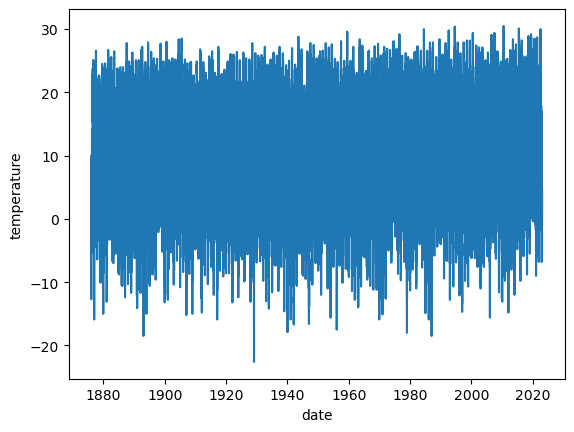

In [45]:
sns.lineplot(data=df_temp, x=df_temp.index, y='temperature')

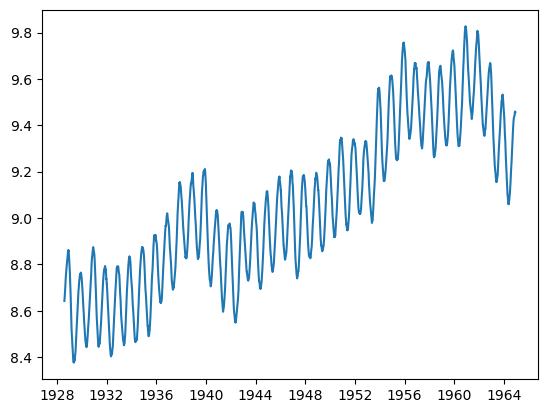

In [46]:
# Rolling window (moving average) can be used

plt.plot(df_temp.loc['1914-12-01': '1964-12-01', 'temperature'].rolling(5000).mean())